In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from dataloader import RetinopathyLoader
from resnet import resnet18, resnet50
from utils import *

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
data_root_path = './data/'

In [3]:
test_dataset = RetinopathyLoader(data_root_path, 'test')
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=8,
)

> Found 7025 testing images...


# ResNet18

## with pretraining

In [ ]:
net = resnet18(True)
net.load_state_dict(torch.load('resnet18_with_pretraining.pkl'))
net.to(device)
acc, targets, preds = cal_acc(net, test_loader, device)
acc

In [ ]:
plot_confusion_matrix(targets, preds, 'ResNet18 with pretraining')

## w/o pretraining

In [ ]:
net = resnet18(False)
net.load_state_dict(torch.load('resnet18_without_pretraining.pkl'))
net.to(device)
acc, targets, preds = cal_acc(net, test_loader, device)
acc

In [ ]:
plot_confusion_matrix(targets, preds, 'ResNet18 without pretraining')

## comparison figure

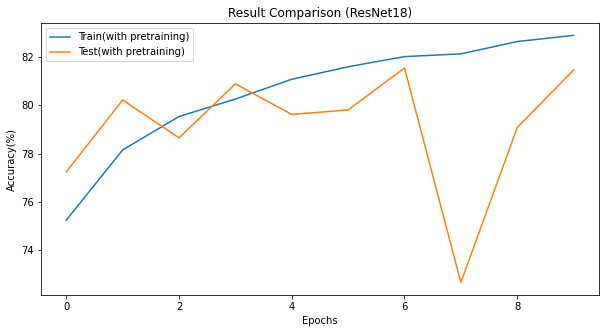

In [4]:
plot_results(18, [True], load_history(18)[:-1])

In [5]:
load_history(18)[:-1]

[{'train_acc': [75.244670628848,
   78.14868856542938,
   79.52952062350974,
   80.25196626214456,
   81.07050072956334,
   81.5865333285882,
   82.00647709882914,
   82.12036015516567,
   82.6292750631695,
   82.88551193992669],
  'test_acc': [77.23843416370107,
   80.2135231316726,
   78.64768683274022,
   80.88256227758008,
   79.61565836298932,
   79.80071174377224,
   81.5373665480427,
   72.66903914590748,
   79.07473309608541,
   81.45195729537366]}]

# ResNet50

## with pretraining

In [ ]:
net = resnet50(True)
net.load_state_dict(torch.load('resnet50_with_pretraining.pkl'))
net.to(device)
acc, targets, preds = cal_acc(net, test_loader, device)
acc

In [ ]:
plot_confusion_matrix(targets, preds, 'ResNet50 with pretraining')

## w/o pretraining

In [ ]:
net = resnet50(False)
net.load_state_dict(torch.load('resnet50_without_pretraining.pkl'))
net.to(device)
acc, targets, preds = cal_acc(net, test_loader, device)
acc

In [ ]:
plot_confusion_matrix(targets, preds, 'ResNet50 without pretraining')

## comparison figure

In [ ]:
plot_results(50, [True, False], load_history(50))